In [10]:
import meep as mp

In [11]:
sz = 100  # size of cell in z direction
fcen = 1 / 3.0  # center frequency of source
df = fcen / 20.0  # frequency width of source
amp = 1  # amplitude of source
k = 1  # Kerr susceptibility
dpml = 1.0  # PML thickness

# We'll use an explicitly 1d simulation.  Setting dimensions=1 will actually
# result in faster execution than just using two no-size dimensions.  However,
# in this case Meep requires us to use E in the x direction (and H in y),
# and our one no-size dimension must be z.
dimensions = 1
cell = mp.Vector3(0, 0, sz)
pml_layers = mp.PML(dpml)
resolution = 20

# to put the same material in all space, we can just set the default material
# and pass it to the Simulation constructor
default_material = mp.Medium(index=1, chi3=k)

sources = mp.Source(
    mp.GaussianSource(fcen, fwidth=df),
    component=mp.Ex,
    center=mp.Vector3(0, 0, -0.5 * sz + dpml),
    amplitude=amp,
)

# frequency range for flux calculation
nfreq = 400
fmin = fcen / 2.0
fmax = fcen * 4

sim = mp.Simulation(
    cell_size=cell,
    geometry=[],
    sources=[sources],
    boundary_layers=[pml_layers],
    default_material=default_material,
    resolution=resolution,
    dimensions=dimensions,
)

In [12]:
trans = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
                     mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 0.5)))

In [13]:
trans1 = sim.add_flux(
    fcen, 0, 1, mp.FluxRegion(mp.Vector3(0, 0, 0.5 * sz - dpml - 0.5))
)
trans3 = sim.add_flux(
    3 * fcen, 0, 1, mp.FluxRegion(mp.Vector3(0, 0, 0.5 * sz - dpml - 0.5))
)

In [14]:
sim.run(
    until_after_sources=mp.stop_when_fields_decayed(
        50, mp.Ex, mp.Vector3(0, 0, 0.5 * sz - dpml - 0.5), 1e-6
    )
)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000117064 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 100 with resolution 20
time for set_epsilon = 0.000487089 s
-----------
field decay(t = 100.05000000000001): 4.16910083472711e-12 / 4.16910083472711e-12 = 1.0
field decay(t = 150.07500000000002): 1.0165409834939727e-08 / 1.0165409834939727e-08 = 1.0
field decay(t = 200.10000000000002): 4.648720329217848e-06 / 4.648720329217848e-06 = 1.0
on time step 9032 (time=225.8), 0.000442918 s/step
field decay(t = 250.125): 0.0005182735319569608 / 0.0005182735319569608 = 1.0
field decay(t = 300.15000000000003): 0.013974697322011658 / 0.013974697322011658 = 1.0
field decay(t = 350.175): 0.0799528900203271 / 0.0799528900203271 = 1.0
field decay(t = 400.20000000000005): 0.1786722946747773 / 0.1786722946747773 = 1.0
field decay(t = 450.225): 0.2324165476954817 / 0.2324165476954817 = 1.0
on time step 18089 (time=452.225), 0.000441672 s/step
field decay(t = 500.25):

ValueError: x and y must have same first dimension, but have shapes (400,) and (2, 800)

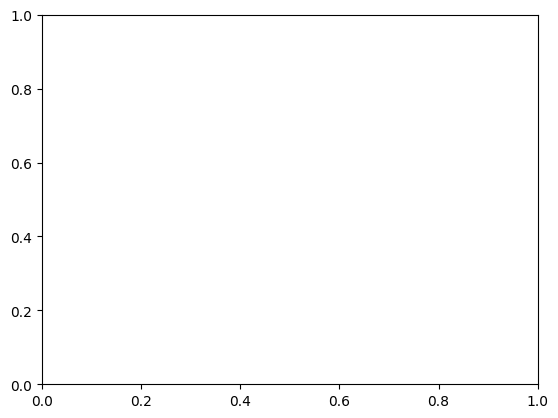

In [17]:
a = sim.get_flux_data(trans)
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(fmin, fmax, nfreq), a[0])

In [16]:
print(
        f"harmonics:, {k}, {amp}, {mp.get_fluxes(trans1)[0]}, {mp.get_fluxes(trans3)[0]}"
    )

harmonics:, 1, 1, 10.259830877929327, 0.757479945752147
